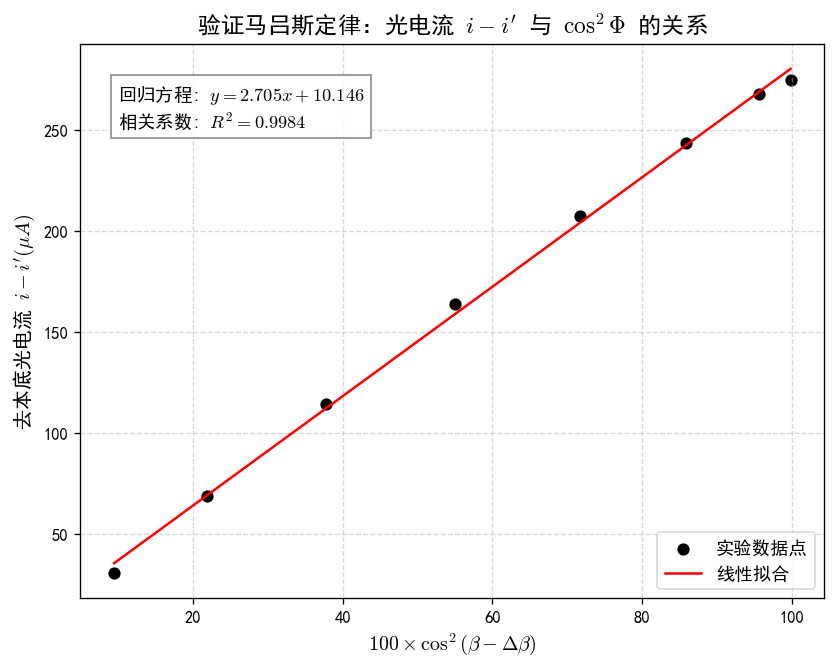

拟合斜率 (k): 2.7047
拟合截距 (b): 10.1463
决定系数 (R^2): 0.99840


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'cm'  # 使用 Computer Modern 字体渲染数学公式

# === 1. 原始实验数据输入 ===
# 偏振片读数 beta
beta = np.array([70, 80, 90, 100, 110, 120, 130, 140])
# 测量光电流 i
i_meas = np.array([275, 268, 244, 208, 164.0, 114.8, 69.3, 31.2])

# === 2. 参数设置 (已更新) ===
delta_beta = 67.9       # 等效夹角
i_background = 0.3      # 本底光电流

# === 3. 数据计算 ===
# 计算实际夹角 Phi = beta - delta_beta
phi_deg = beta - delta_beta
phi_rad = np.radians(phi_deg)

# X轴数据: 100 * cos^2(Phi)
x_data = 100 * (np.cos(phi_rad)**2)

# Y轴数据: 去本底后的光电流
y_data = i_meas - i_background

# === 4. 线性拟合 (y = kx + b) ===
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
line_fit = slope * x_data + intercept

# === 5. 绘图 ===
plt.figure(figsize=(8, 6), dpi=120) # 提高分辨率

# 绘制散点
plt.scatter(x_data, y_data, color='black', marker='o', s=40, label='实验数据点')

# 绘制拟合直线
plt.plot(x_data, line_fit, color='red', linestyle='-', linewidth=1.5, label=f'线性拟合')

# 坐标轴与标题
plt.title(r'验证马吕斯定律：光电流 $i-i^\prime$ 与 $\cos^2\Phi$ 的关系', fontproperties='SimHei', fontsize=14)
plt.xlabel(r'$100 \times \cos^2(\beta - \Delta\beta)$', fontsize=12)
plt.ylabel(r'去本底光电流 $i - i^\prime (\mu A)$', fontproperties='SimHei', fontsize=12)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.5)

# 在图上显示回归方程和相关系数
info_text = (f'回归方程: $y = {slope:.3f}x + {intercept:.3f}$\n'
             f'相关系数: $R^2 = {r_value**2:.4f}$')
plt.text(0.05, 0.85, info_text, transform=plt.gca().transAxes,
         fontsize=11, bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

plt.legend(prop={'family': 'SimHei', 'size': 11}, loc='lower right')
plt.show()

# === 6. 打印结果供报告填写 ===
print(f"拟合斜率 (k): {slope:.4f}")
print(f"拟合截距 (b): {intercept:.4f}")
print(f"决定系数 (R^2): {r_value**2:.5f}")